What is Employee Attrition?

It refers to the loss of employees from an organization, typically due to voluntary departures like resignations or retirements, or involuntary reasons like layoffs or terminations. It often leads to a reduction in the workforce, either intentionally through downsizing, or naturally through the employee lifecycle.

Key Task 1: Analyze Historical Employee Data


Objective: Understand demographics (e.g., Age, Gender, MaritalStatus) and performance metrics (e.g., PerformanceRating, JobSatisfaction) through exploratory data analysis (EDA).

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel  

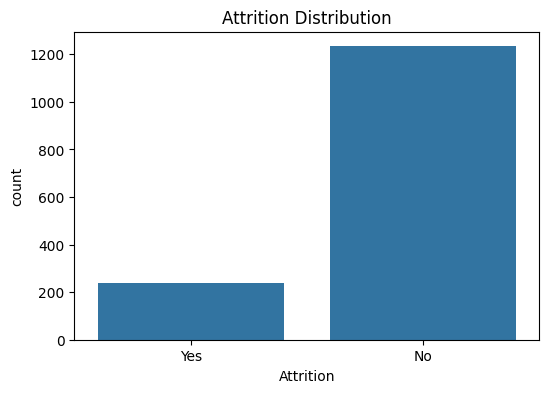

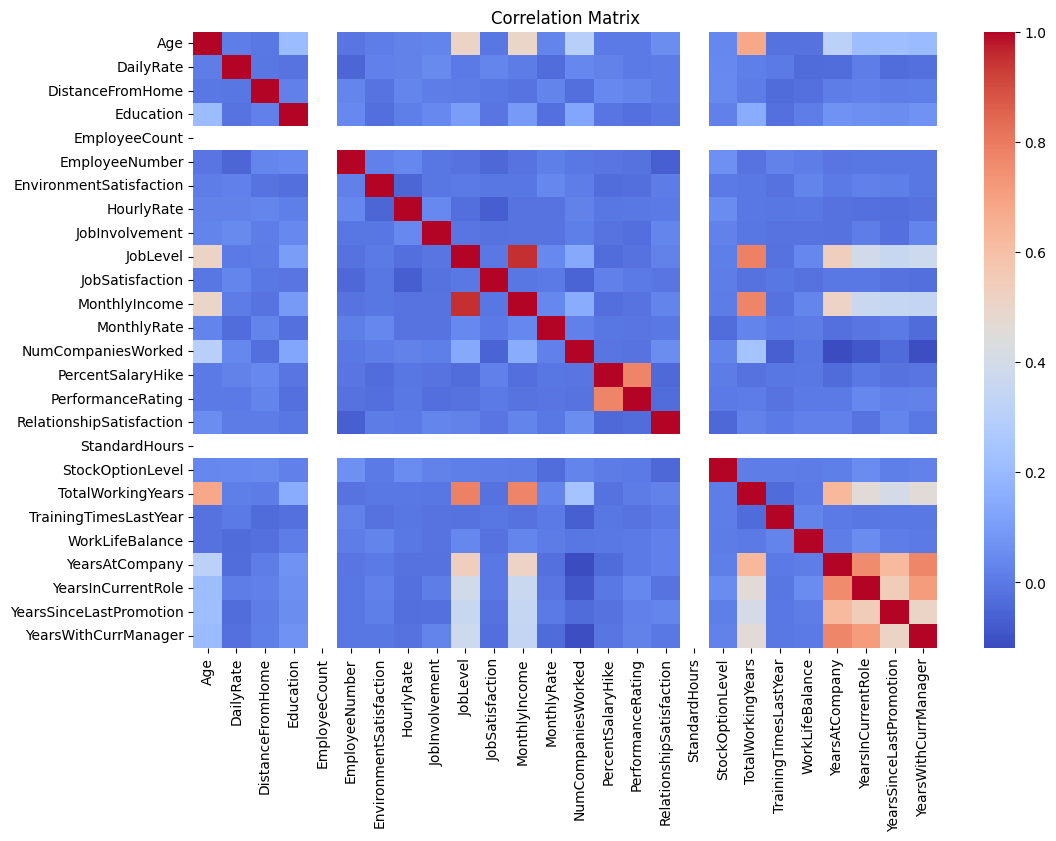

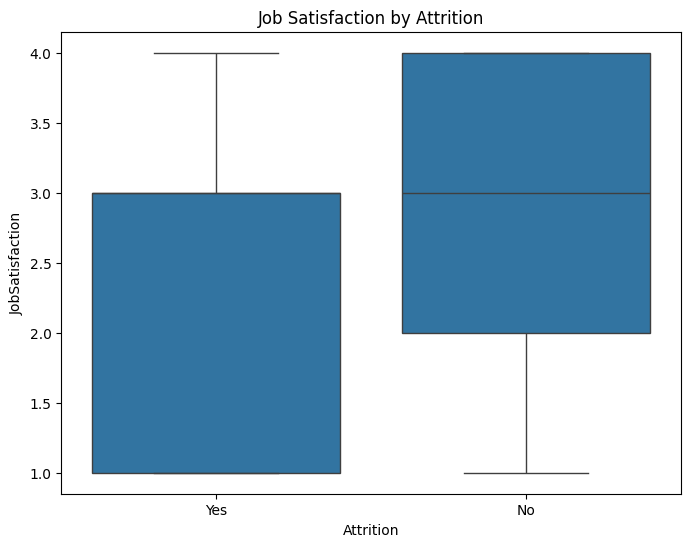

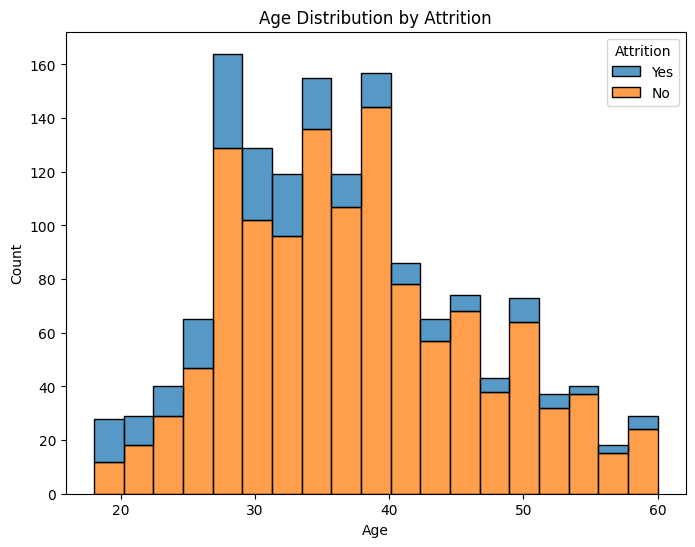

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (fixed path with quotes)
# Ensure the file is uploaded to your Colab environment or adjust the path
df0 = pd.read_csv('/content/HR-Employee-Attrition.csv')

# Basic information
print("Dataset Info:")
print(df0.info())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df0.describe())

# Attrition distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df0)
plt.title('Attrition Distribution')
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df0.select_dtypes(include=['int64', 'float64']).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot for JobSatisfaction vs Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df0)
plt.title('Job Satisfaction by Attrition')
plt.show()

# Distribution of Age by Attrition
plt.figure(figsize=(8, 6))
sns.histplot(data=df0, x='Age', hue='Attrition', multiple='stack')
plt.title('Age Distribution by Attrition')
plt.show()

Key Task 2: Preprocess Data

Objective: Handle missing values, encode categorical variables, and remove redundant data.

In [ ]:
# Import required libraries
import pandas as pd

# Load dataset (if not already loaded)
df0 = pd.read_csv('/content/HR-Employee-Attrition.csv')

# Check for missing values
print("\nMissing Values:")
print(df0.isnull().sum())

# Drop redundant columns (constant or uninformative)
df_enc = df0.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

# Encode categorical variables
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_enc = pd.get_dummies(df_enc, columns=categorical_cols, drop_first=False)

# Check for outliers in numerical columns
numerical_cols = df_enc.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = df_enc[col].quantile(0.25)
    Q3 = df_enc[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_enc[(df_enc[col] < Q1 - 1.5 * IQR) | (df_enc[col] > Q3 + 1.5 * IQR)][col]
    if not outliers.empty:
        print(f"\nOutliers in {col}: {len(outliers)} instances")

# Display first few rows of preprocessed data
print("\nPreprocessed Data:")
df_enc.head()


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,False,False,False,True,False,False,False,True,False,True
1,49,279,8,1,2,3,61,2,2,2,...,False,False,True,False,False,False,True,False,True,False
2,37,1373,2,2,4,4,92,2,1,3,...,False,False,False,False,False,False,False,True,False,True
3,33,1392,3,4,5,4,56,3,1,3,...,False,False,True,False,False,False,True,False,False,True
4,27,591,2,1,7,1,40,3,1,2,...,False,False,False,False,False,False,True,False,True,False


Key Task 3: Engineer Features

Objective: Create features related to employee satisfaction and engagement.

In [ ]:
# Import required libraries
import pandas as pd

# Assume df_enc from Task 2 (preprocessed data with encoded variables)
# If starting fresh, include preprocessing steps
df0 = pd.read_csv('/content/HR-Employee-Attrition.csv')
df_enc = df0.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_enc = pd.get_dummies(df_enc, columns=categorical_cols, drop_first=False)

# Feature engineering
df_enc['Satisfaction_Score'] = df_enc[['JobSatisfaction', 'EnvironmentSatisfaction',
                                      'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
df_enc['Tenure_Per_Company'] = df_enc['TotalWorkingYears'] / (df_enc['NumCompaniesWorked'] + 1)
df_enc['Promotion_Lag'] = df_enc['YearsAtCompany'] - df_enc['YearsSinceLastPromotion']

# Display new features
print("\nNew Features Added:")
print(df_enc[['Satisfaction_Score', 'Tenure_Per_Company', 'Promotion_Lag']].head())


New Features Added:
   Satisfaction_Score  Tenure_Per_Company  Promotion_Lag
0                2.00            0.888889              6
1                3.00            5.000000              9
2                3.00            1.000000              0
3                3.25            4.000000              5
4                2.50            0.600000              0


Key Task 4: Build a Classification Model

Objective: Develop a model to predict employee attrition.

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assume df_enc from Task 3 (preprocessed and feature-engineered data)
# If starting fresh, include preprocessing and feature engineering
df0 = pd.read_csv('/content/HR-Employee-Attrition.csv')
df_enc = df0.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_enc = pd.get_dummies(df_enc, columns=categorical_cols, drop_first=False)
df_enc['Satisfaction_Score'] = df_enc[['JobSatisfaction', 'EnvironmentSatisfaction',
                                      'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
df_enc['Tenure_Per_Company'] = df_enc['TotalWorkingYears'] / (df_enc['NumCompaniesWorked'] + 1)
df_enc['Promotion_Lag'] = df_enc['YearsAtCompany'] - df_enc['YearsSinceLastPromotion']

# Select features and target
X = df_enc.drop(['MonthlyRate', 'Attrition_No', 'Attrition_Yes'], axis=1)
y = df_enc['Attrition_Yes'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Initialize and train models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("Classification models trained successfully.")

Classification models trained successfully.


Key Task 5: Evaluate and Interpret Model Performance

Objective: Assess model performance using metrics and visualizations.


Random Forest Evaluation:
Accuracy: 0.8451
Precision: 0.5714
Recall: 0.1356
F1 Score: 0.2192
ROC-AUC: 0.5581

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.98      0.91       309
         Yes       0.57      0.14      0.22        59

    accuracy                           0.85       368
   macro avg       0.71      0.56      0.57       368
weighted avg       0.81      0.85      0.80       368



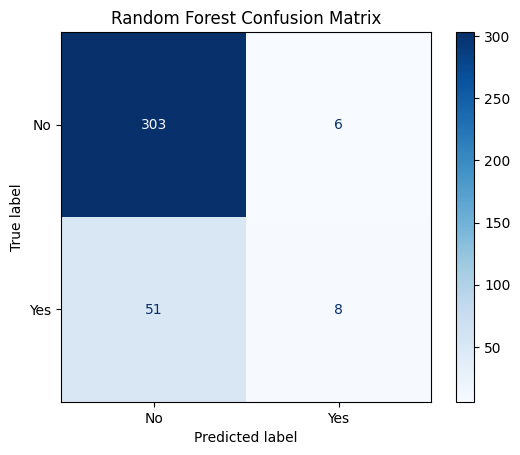


XGBoost Evaluation:
Accuracy: 0.8614
Precision: 0.6667
Recall: 0.2712
F1 Score: 0.3855
ROC-AUC: 0.6226

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.97      0.92       309
         Yes       0.67      0.27      0.39        59

    accuracy                           0.86       368
   macro avg       0.77      0.62      0.65       368
weighted avg       0.84      0.86      0.84       368



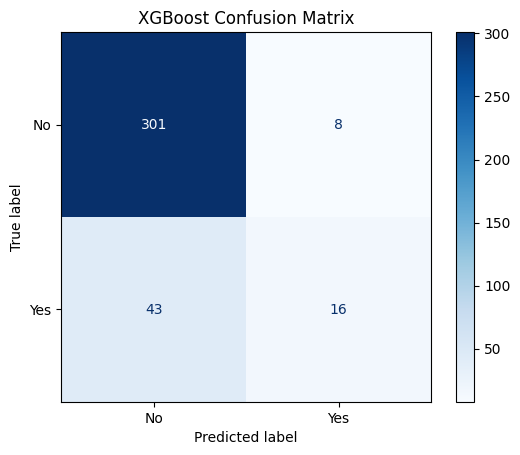

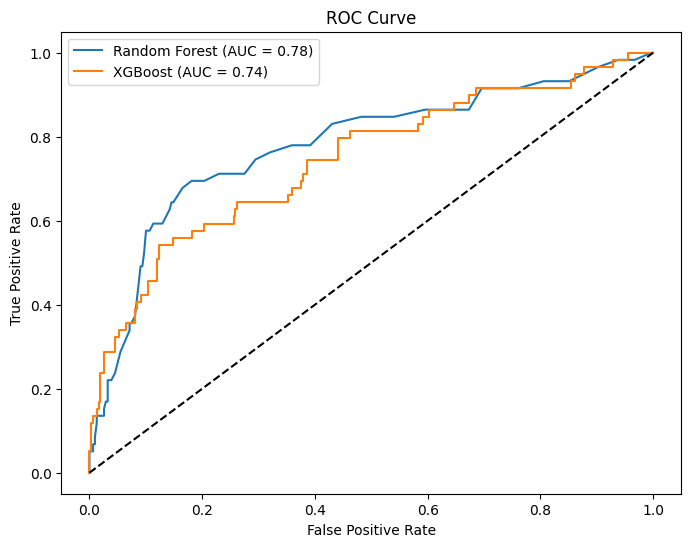

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assume X_train, X_test, y_train, y_test, rf_model, xgb_model from Task 4
# Make predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluate models
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

# ROC Curve
plt.figure(figsize=(8, 6))
for model, name in [(rf_model, "Random Forest"), (xgb_model, "XGBoost")]:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Goal 1: Achieve a Classification Accuracy of at Least 85%

Objective: Ensure at least one model achieves 85% accuracy, with hyperparameter tuning if needed.

In [ ]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

# Assume X_train, X_test, y_train, y_test from Task 4
# If accuracy < 85%, tune XGBoost hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid, cv=5, scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Best model
xgb_tuned = grid_search.best_estimator_
xgb_tuned_pred = xgb_tuned.predict(X_test)

# Evaluate tuned model
print("\nTuned XGBoost Evaluation:")
accuracy = accuracy_score(y_test, xgb_tuned_pred)
print(f"Accuracy: {accuracy:.4f}")
if accuracy >= 0.85:
    print("✓ Goal achieved: Accuracy >= 85%")
else:
    print("✗ Accuracy < 85%. Consider further tuning or SMOTE for class imbalance.")
print("Best parameters:", grid_search.best_params_)


Tuned XGBoost Evaluation:
Accuracy: 0.8560
✓ Goal achieved: Accuracy >= 85%
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Goal 2: Identify the Top Three Factors Contributing to Employee Attrition

Objective: Determine the most influential features driving attrition.

<Figure size 1000x600 with 0 Axes>

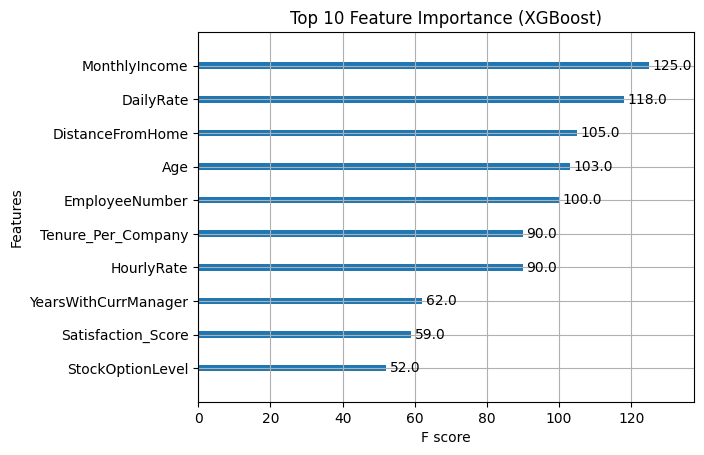


Top 3 Factors Contributing to Attrition:
                         Feature  Importance
45  JobRole_Sales Representative    0.056742
52            Tenure_Per_Company    0.052198
49                   OverTime_No    0.050761


In [ ]:
# Import required libraries
import pandas as pd
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assume xgb_model from Task 4 (or use xgb_tuned from Goal 1)
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title('Top 10 Feature Importance (XGBoost)')
plt.show()

# Get top 3 features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTop 3 Factors Contributing to Attrition:")
print(feature_importance.head(3))

Goal 3: Provide Retention Strategies Based on Model Insights

Objective: Offer actionable recommendations to reduce employee turnover.

In [ ]:
# Assume feature_importance from Goal 2
top_features = feature_importance.head(3)['Feature'].tolist()
print("\nRetention Strategies Based on Model Insights:")
for i, feature in enumerate(top_features, 1):
    if 'Satisfaction' in feature:
        print(f"{i}. Improve Employee Satisfaction: Conduct regular engagement surveys, offer flexible work hours, and implement recognition programs to boost satisfaction metrics like {feature}.")
    elif 'OverTime' in feature:
        print(f"{i}. Manage Overtime: Review workload distribution, provide compensatory time off, or offer incentives to reduce burnout associated with {feature}.")
    elif 'Income' in feature or 'Salary' in feature:
        print(f"{i}. Enhance Compensation: Offer competitive salaries or bonuses to address low {feature} as a driver of attrition.")
    elif 'Promotion' in feature:
        print(f"{i}. Enhance Career Development: Provide clear promotion paths and regular performance reviews to address {feature}.")
    else:
        print(f"{i}. Address {feature}: Investigate specific policies or programs to mitigate the impact of {feature} on attrition.")


Retention Strategies Based on Model Insights:
1. Address JobRole_Sales Representative: Investigate specific policies or programs to mitigate the impact of JobRole_Sales Representative on attrition.
2. Address Tenure_Per_Company: Investigate specific policies or programs to mitigate the impact of Tenure_Per_Company on attrition.
3. Manage Overtime: Review workload distribution, provide compensatory time off, or offer incentives to reduce burnout associated with OverTime_No.
